In [1]:
# Import libraries, dependencies
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import hvplot.pandas
import requests
import json

# Other imports
from config import geoapify_key

In [ ]:
#Place the healthcare facility results into a DF(Kelsy). 
#Save the df as a csv file. 
#This work is in the den_healthcare_1 and den_healthcare_2 files

In [2]:
# Import our healthcare data into pandas from CSV 
file_path = 'Resources/denver_healthcare_data.csv'
denver_h_df = pd.read_csv(file_path, low_memory=False)

denver_h_df.head()

,Unnamed: 0,Facility Name,Categories,Zipcode,Lat,Lng
0,0,Presbyterian / Saint Luke's Medical Center,"['building', 'building.healthcare', 'healthcar...",80218.0,39.747157,-104.967097
1,1,AdventHealth Parker Hospital,"['healthcare', 'healthcare.hospital']",80138.0,39.548590,-104.769092
2,2,The Medical Center Of Aurora,"['healthcare', 'healthcare.hospital']",80012.0,39.690247,-104.832144
3,3,Porter Adventist Hospital,"['healthcare', 'healthcare.hospital']",80210.0,39.669970,-104.975883
4,4,Swedish Medical Center,"['healthcare', 'healthcare.hospital']",80113.0,39.654280,-104.981215


In [3]:
#Create a clean df of only zip codes and number of facilities as integers (Lisa)
h_counts = denver_h_df['Zipcode'].value_counts()
h_counts = h_counts.reset_index()
h_counts = pd.DataFrame(h_counts)
h_counts = h_counts.rename(columns={'Zipcode':'Zip Code', 'count':'Number of Facilities'})
h_counts['Zip Code'] = h_counts['Zip Code'].astype('int64')
h_counts.head()

,Zip Code,Number of Facilities
0,80015,43
1,80218,42
2,80211,42
3,80016,37
4,80012,35


In [4]:
#Get population, median age, per capita income, of each zip code and add to data frame with healthcare facility info (Lisa)
#from https://data.colorado.gov/ (Lisa)

url_pop = 'https://data.colorado.gov/resource/ucnv-vw74.json?'
for index, row in h_counts.iterrows():
    #create the parameters, full url for the API call
    params_pop = {'zip_code': h_counts.loc[index, "Zip Code"],
              }
    response_pop = requests.get(url_pop, params=params_pop)
    response_pop = response_pop.json()

    # Store the zip's population, per capita income and median age in the denver_df DataFrame
    try:
        h_counts.loc[index, "Population"] = response_pop[0]["pop"]
        
    except (KeyError, IndexError):
        h_counts.loc[index, "Population"] = np.nan
    try:
        h_counts.loc[index, "Per Capita Income"] = response_pop[0]['per_cap_in']
    except (KeyError, IndexError):
        h_counts.loc[index, "Per Capita Income"] = np.nan
    try: 
        h_counts.loc[index, 'Median Age'] = response_pop[0]['med_age']
    except (KeyError, IndexError):
        h_counts.loc[index, "Median Age"] = np.nan
h_counts

,Zip Code,Number of Facilities,Population,Per Capita Income,Median Age
0,80015,43,70215,41860,37.6
1,80218,42,18915,71825,34.9
2,80211,42,36061,59034,34
3,80016,37,58948,55122,38.5
4,80012,35,53862,26477,32.8
...,...,...,...,...,...
90,80437,1,NaN,NaN,NaN
91,80024,1,209,12189,36.1
92,80125,1,10832,56162,41.1
93,80640,1,12850,32546,35.3


In [5]:
#Clear empty values and save combined data set to a csv file(Lisa)
h_counts = h_counts.dropna()
h_counts.head()
h_counts.to_csv('resources/combined_data.csv', index= False)

In [6]:
# Lisa - work is in separate file: question_1_vis
# Question 1: are healthcare facilities more dense where the population is dense? In other words: 
# Is there a correlation between pop of zip code and  number of facilities in the zip code?
# plot #of healthcare facilities per zip code and population per zip code (double bars with zip as x axis)
# scatter plot and linear regression of facility count vs population
# maps

In [7]:
# Liz

# Question 2: Is there a correlation of per capita income with # of healthcare facilities by zip code in Denver?
# TODO: plot #of healthcare facilities per zip code against per cap income
# TODO: scatter plot and lin reg of  zip code against per cap income 

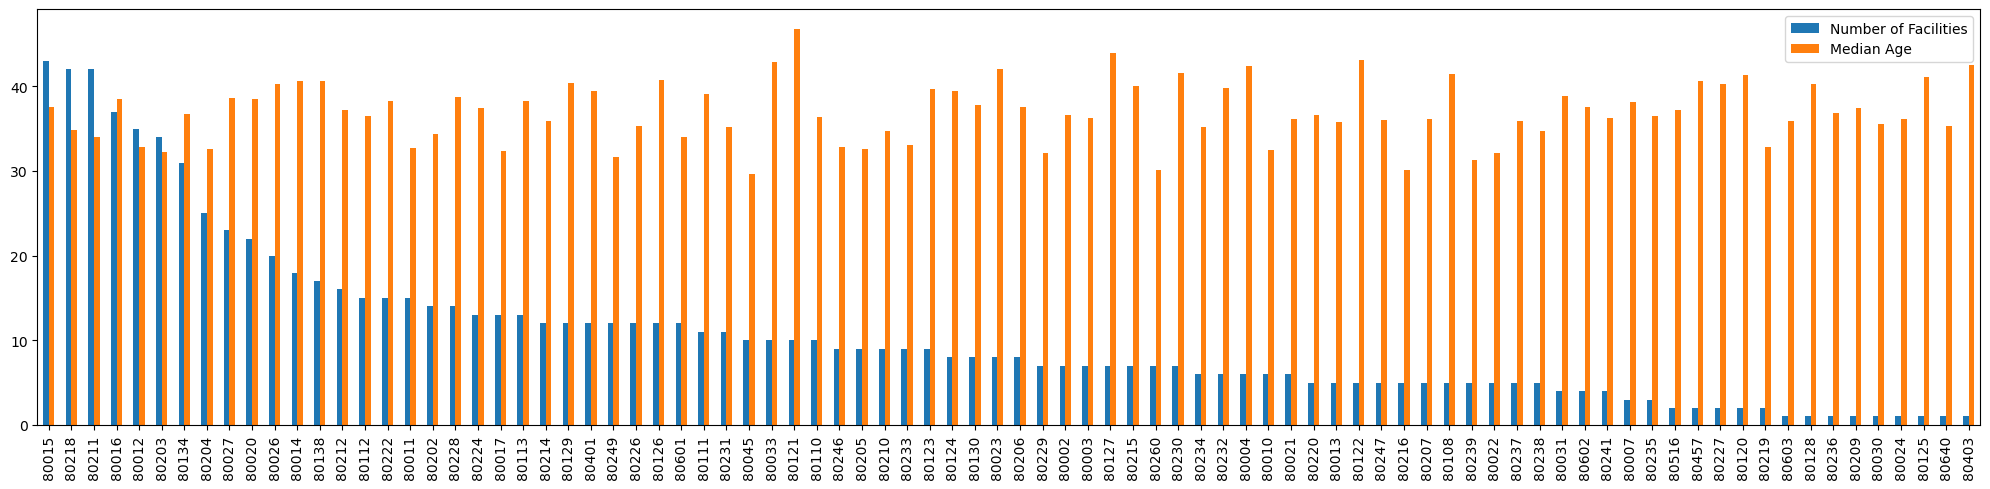

In [8]:
# Kelsy
# Question 3: Is there a correlation of median age with # of healthcare facilities by zip code in Denver?
denver_df = pd.read_csv("resources/combined_data.csv")

# TODO: Some kind of plot (double bar, map?, line?) #of healthcare facilities per zip code against median age
age_and_facility_df = denver_df[["Number of Facilities", "Median Age"]]
age_facility_plot = age_and_facility_df.plot(kind="bar", figsize=(20,5))
age_facility_plot.set_xticklabels(denver_df["Zip Code"])
plt.tight_layout()

# Save the figure
plt.savefig("output_data/med_age_and_facilities_multi_bar.png")
# Show bar chart
plt.show()


The coefficient of determination is 0.017925898466502693


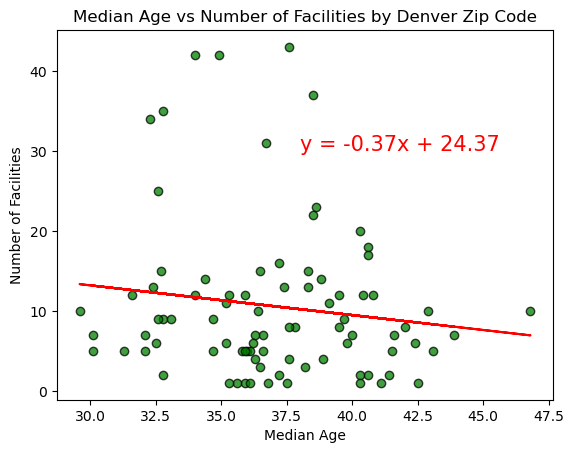

In [9]:
# TODO: scatter plot and lin reg of number of faciliies against median age
x = denver_df["Median Age"]
y = denver_df["Number of Facilities"]
(slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
lr_values = x * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x,y, facecolors="green", edgecolors="black", alpha=0.75)
plt.plot(x,lr_values,"r-")
plt.annotate(line_eq,(38, 30),fontsize=15,color="red")
plt.title("Median Age vs Number of Facilities by Denver Zip Code")
plt.xlabel("Median Age")
plt.ylabel("Number of Facilities")

print(f"The coefficient of determination is {rvalue**2}")

# Save the figure
plt.savefig("output_data/med_age_and_facilities_scatter.png")
# Show scatter plot
plt.show()

In [ ]:
# Bonus
# Quesion 4: What percentage of facilities are wheelchair accessible and what percentage by subcategory?
#TODO: count # and find % of facilities with wheelchair access
#TODO: If not very close to 100%, plot types of facility against wheelchair access(bar)
#TODO: map with color of facility dot by wheelchair access

In [ ]:
#written analysis (Liz first draft)

#prepare slides for presentation (Liz first draft)

#discussed presentation